<a href="https://colab.research.google.com/github/Mirai-Kuma/DSProject/blob/master/Tourism_REAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import และ อ่านไฟล์

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import folium
import geopandas as gpd
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib import colors as mcolors
from matplotlib.patheffects import withStroke
from matplotlib.patches import Rectangle

warnings.filterwarnings("ignore")

In [2]:
tour = pd.read_csv('tourism_dataset.csv')

### แสดง dataframe

In [3]:
tour.head()

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


### แสดง info ของ dataframe

In [4]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 5989 non-null   object 
 1   Country                  5989 non-null   object 
 2   Category                 5989 non-null   object 
 3   Visitors                 5989 non-null   int64  
 4   Rating                   5989 non-null   float64
 5   Revenue                  5989 non-null   float64
 6   Accommodation_Available  5989 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 327.6+ KB


### Clean data โดยการเพิ่ม attribute ID และเปลี่ยนชื่อประเทศให้อยู่ใน format เดียวกัน

In [5]:
tour = tour.reset_index().rename(columns = {'index':'ID'})
tour['Country'] = tour['Country'].replace('USA', 'United States of America')
tour.head()

,ID,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,1,aHKUXhjzTo,United States of America,Historical,813627,2.01,802625.60,No
2,2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


## ค่าเฉลี่ยต่างๆ

In [6]:
mean_df = pd.DataFrame(tour.groupby('Country')['Visitors'].mean().sort_values(ascending=False))
mean_df = mean_df.join(tour.groupby('Country')['Revenue'].mean().sort_values(ascending=False))
mean_df = mean_df.join(tour.groupby('Country')['Rating'].mean().sort_values(ascending=False))
print('Max Visitors by Country:', mean_df['Visitors'].idxmax(), '-', mean_df['Visitors'].max())
print('Min Visitors by Country:', mean_df['Visitors'].idxmin(), '-', mean_df['Visitors'].min())
print('Max Revenue by Country:', mean_df['Revenue'].idxmax(), '-', mean_df['Revenue'].max())
print('Min Revenue by Country:', mean_df['Revenue'].idxmin(), '-', mean_df['Revenue'].min())
print('Max Rating by Country:', mean_df['Rating'].idxmax(), '-', mean_df['Rating'].max())
print('Min Rating by Country:', mean_df['Rating'].idxmin(), '-', mean_df['Rating'].min())
mean_df

Max Visitors by Country: United States of America - 508495.50353773584
Min Visitors by Country: Brazil - 493206.56904761906
Max Revenue by Country: Brazil - 508075.23841666663
Min Revenue by Country: France - 479027.5872462077
Max Rating by Country: Brazil - 3.0741666666666667
Min Rating by Country: China - 2.958647642679901


,Visitors,Revenue,Rating
Country,,,
United States of America,508495.503538,504369.440507,2.984304
India,503440.853795,507451.226953,2.973158
Egypt,502821.986842,505038.149704,3.024298
China,501796.987593,494332.975496,2.958648
Australia,501250.608434,497184.737663,3.019602
France,495851.366394,479027.587246,3.030268
Brazil,493206.569048,508075.238417,3.074167


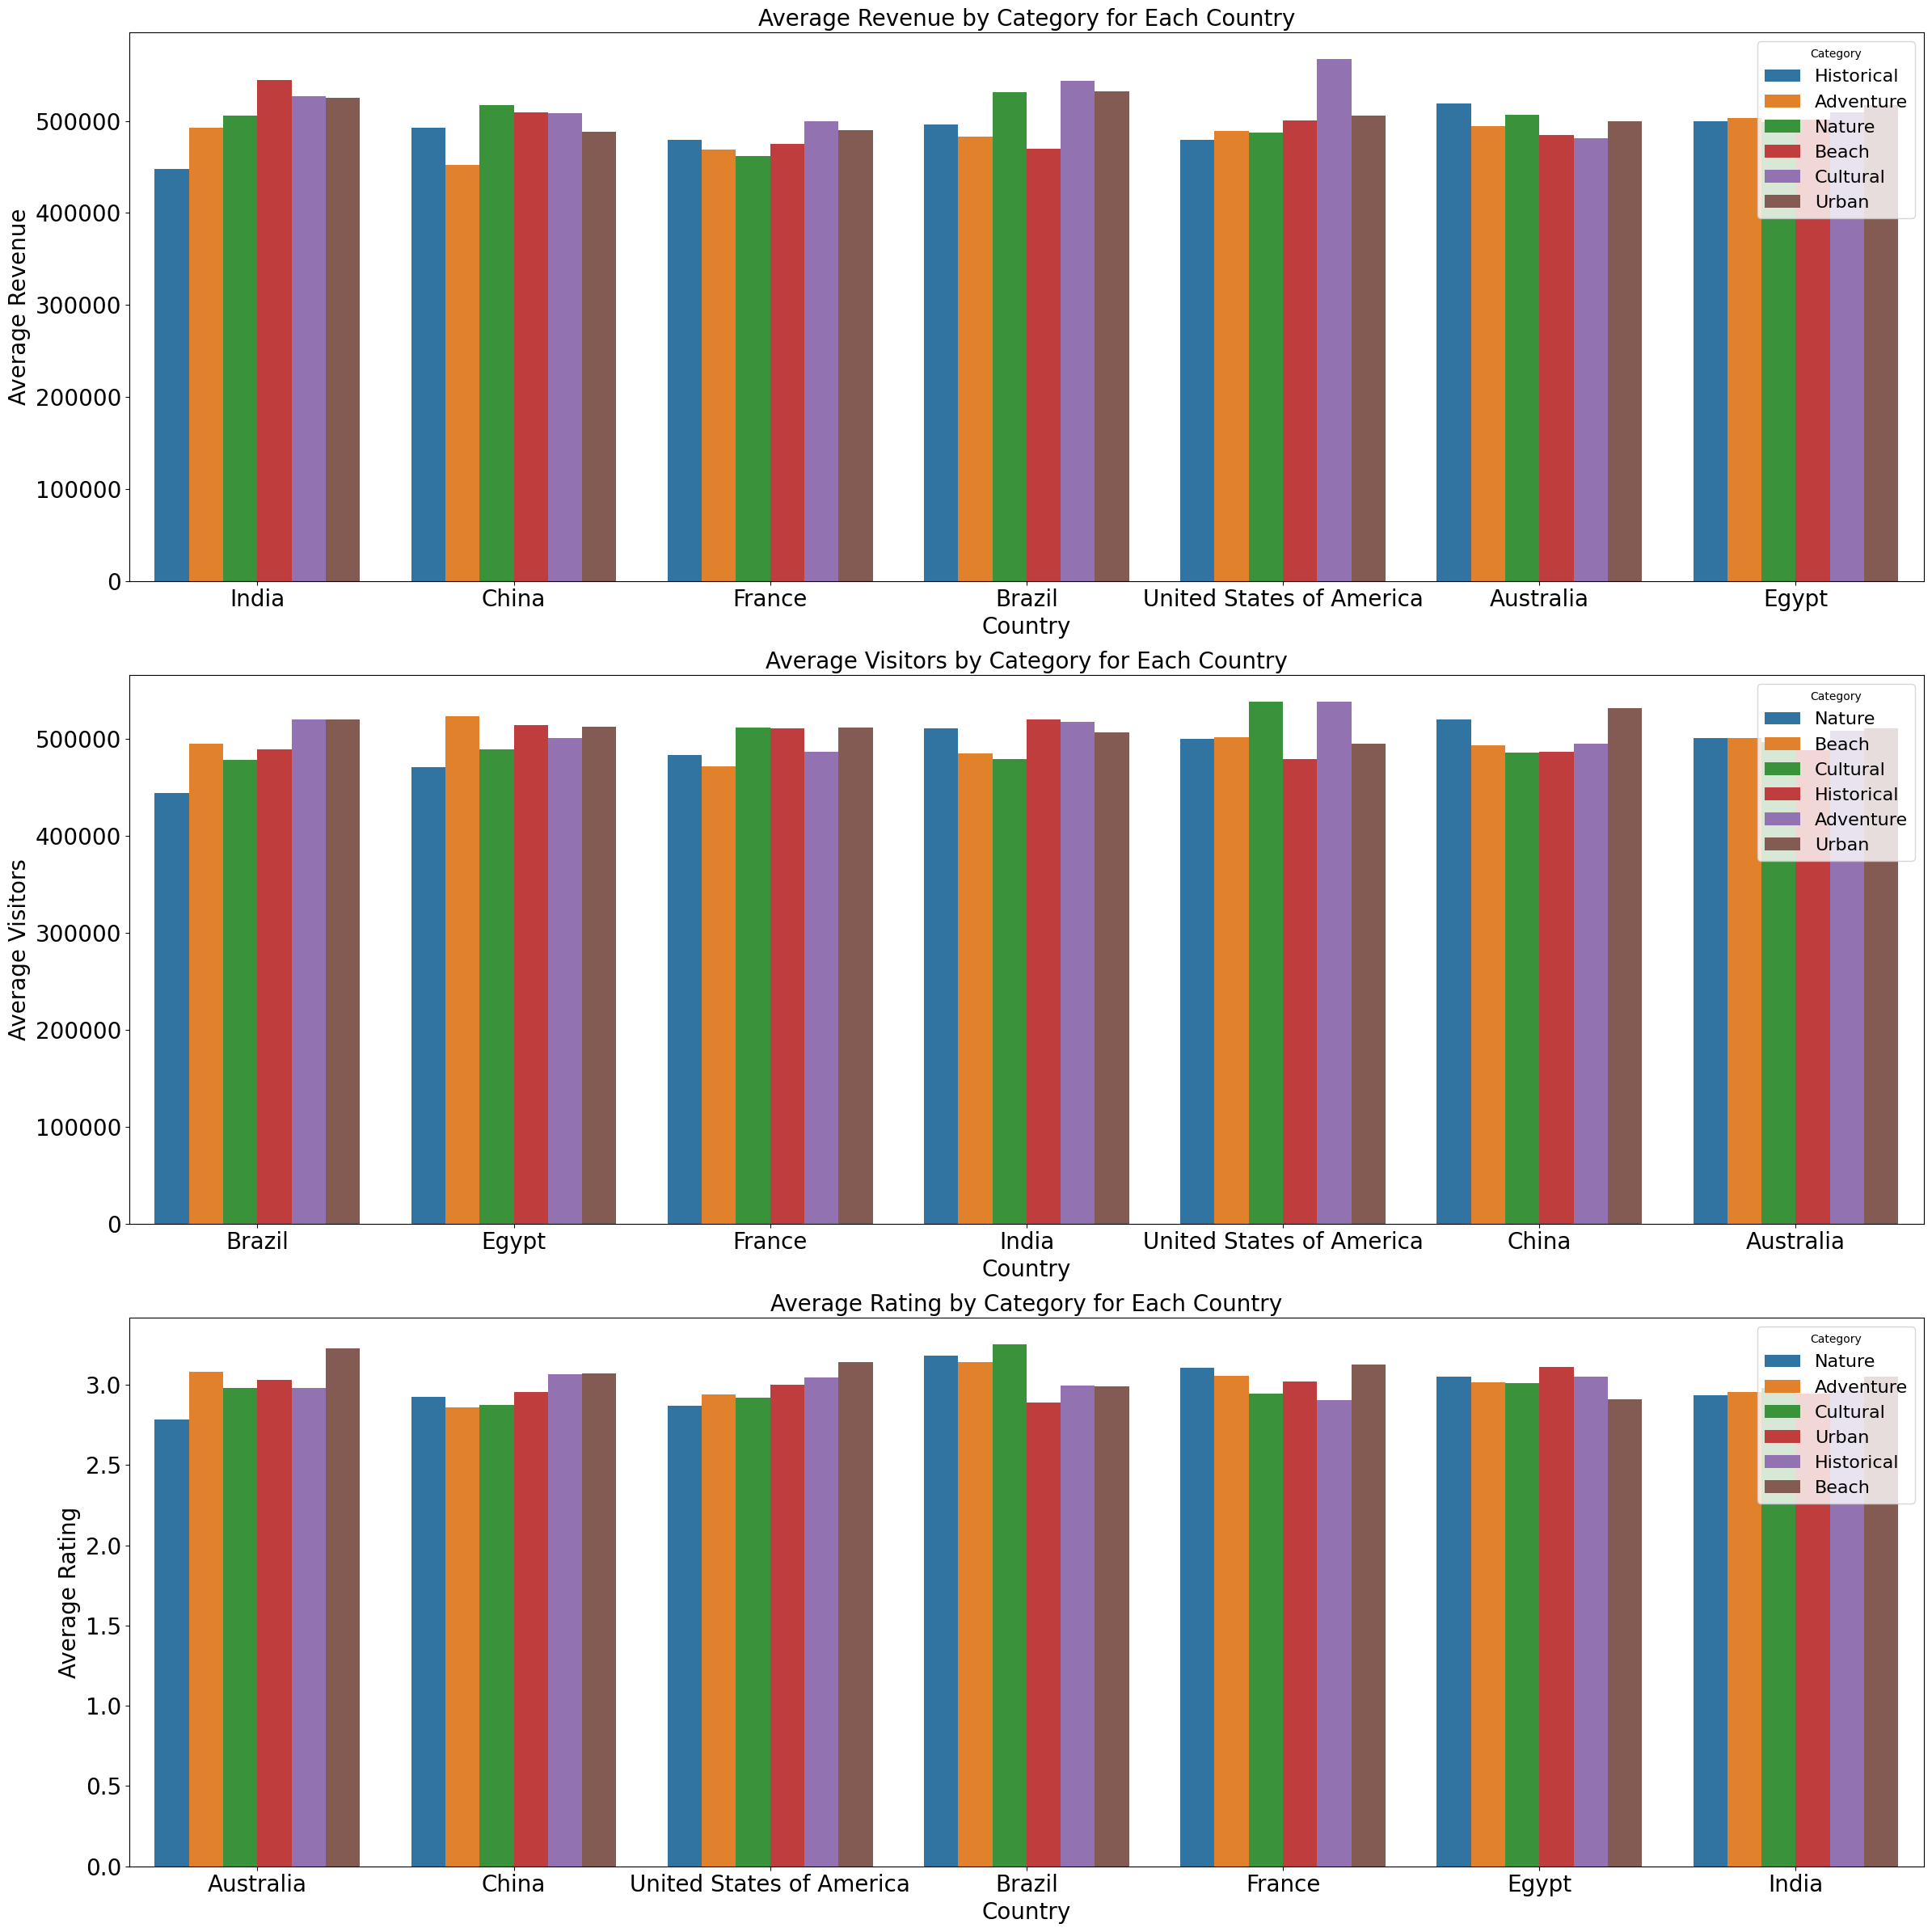

In [11]:
avg_revenue = tour.groupby(['Country', 'Category'])['Revenue'].mean().sort_values().reset_index()
avg_visitors = tour.groupby(['Country', 'Category'])['Visitors'].mean().sort_values().reset_index()
avg_rating = tour.groupby(['Country', 'Category'])['Rating'].mean().sort_values().reset_index()

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(24, 24))

# กราฟ Revenue
sns.barplot(data=avg_revenue, ax=ax[0], x='Country', y='Revenue', hue='Category')
ax[0].set_title('Average Revenue by Category for Each Country', fontsize=20)
ax[0].set_xlabel('Country', fontsize=20)
ax[0].set_ylabel('Average Revenue', fontsize=20)
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(title='Category', fontsize=16)

# กราฟ Visitors
sns.barplot(data=avg_visitors, ax=ax[1], x='Country', y='Visitors', hue='Category')
ax[1].set_title('Average Visitors by Category for Each Country', fontsize=20)
ax[1].set_xlabel('Country', fontsize=20)
ax[1].set_ylabel('Average Visitors', fontsize=20)
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(title='Category', fontsize=16)

# กราฟ Rating
sns.barplot(data=avg_rating, ax=ax[2], x='Country', y='Rating', hue='Category')
ax[2].set_title('Average Rating by Category for Each Country', fontsize=20)
ax[2].set_xlabel('Country', fontsize=20)
ax[2].set_ylabel('Average Rating', fontsize=20)
ax[2].tick_params(axis='both', labelsize=20)
ax[2].legend(title='Category', fontsize=16)

plt.tight_layout()
plt.show()

## การแสดงความถี่และความหนาแน่น

<Axes: ylabel='Density'>

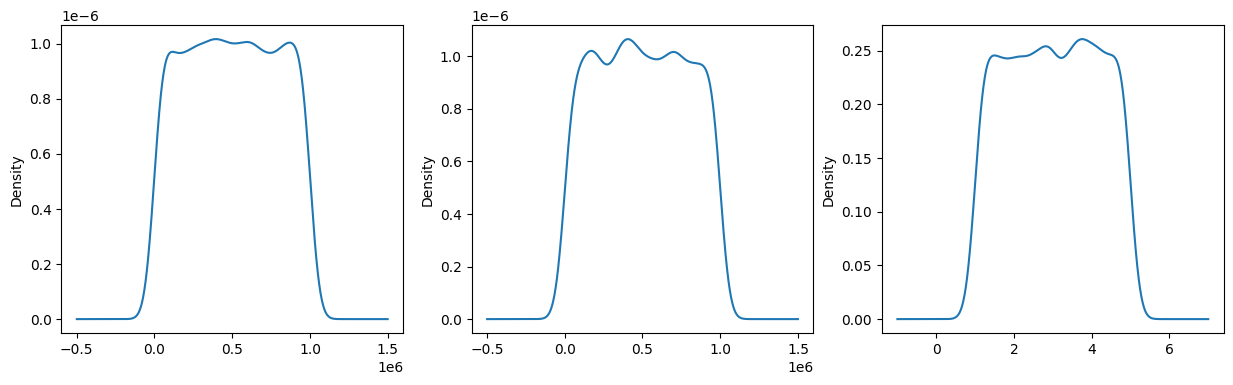

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
tour['Visitors'].plot(ax=ax[0], kind='density')
tour['Revenue'].plot(ax=ax[1], kind='density')
tour['Rating'].plot(ax=ax[2], kind='density')

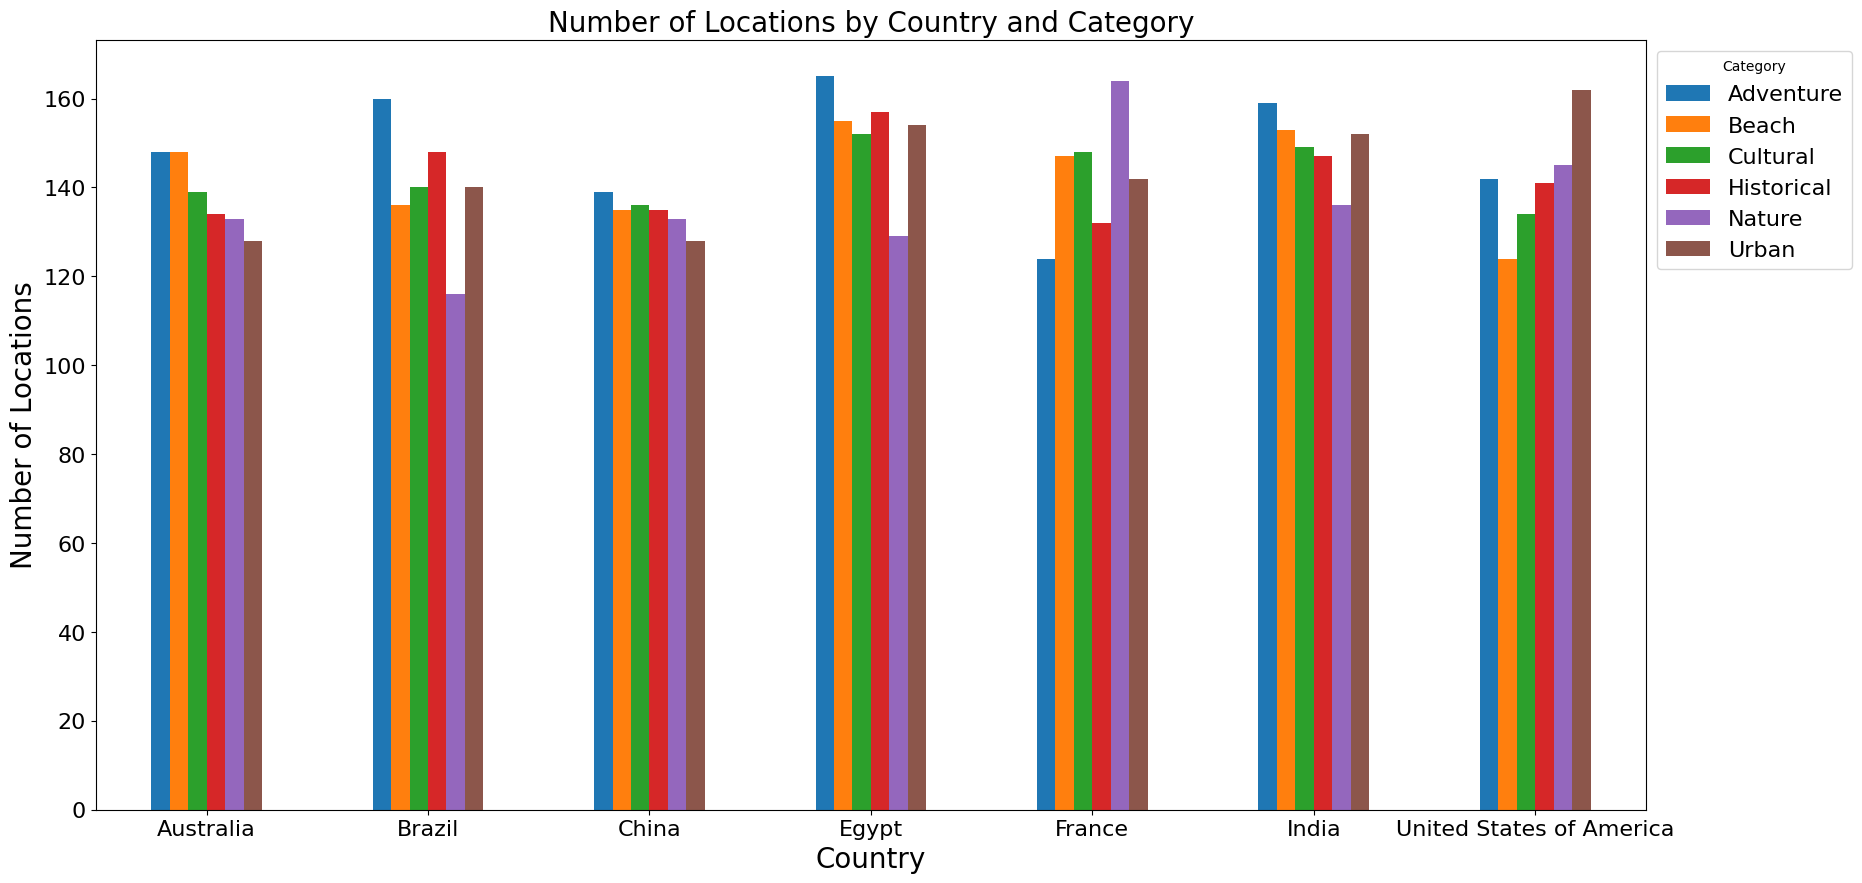

In [10]:
tour.groupby(['Country', 'Category'])['Location'].count().unstack().plot(kind='bar', figsize=(20, 10))
plt.xlabel('Country', fontsize=20)
plt.ylabel('Number of Locations', fontsize=20)
plt.title('Number of Locations by Country and Category', fontsize=20)
plt.legend(title='Category', loc='upper left',bbox_to_anchor=(1 , 1) , fontsize=16)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.show()